In [ ]:
!pip install plotly

In [2]:
import pandas as pd 
import re

In [3]:
df = pd.read_parquet("ruta_datosSpark", engine='pyarrow')

In [109]:
df.head()

,id_object,content,datetime,label
0,290422,day wonder whi thing whi choos take ap class t...,2018-09-21 13:14:46,depression
1,313753,start talk guy pof like month ago talk everi n...,2018-03-16 11:36:18,depression
2,290423,im far gone iv depress 6 year dad left 2 year ...,2020-05-24 09:30:30,depression
3,313754,frustrat thing dont understand feel come life ...,2018-03-06 15:26:02,depression
4,290424,sorri super long post need vent didnt cri beca...,2016-03-17 12:48:31,depression


In [4]:
df = df.dropna()

In [111]:
df.head()

,id_object,content,datetime,label
0,290422,day wonder whi thing whi choos take ap class t...,2018-09-21 13:14:46,depression
1,313753,start talk guy pof like month ago talk everi n...,2018-03-16 11:36:18,depression
2,290423,im far gone iv depress 6 year dad left 2 year ...,2020-05-24 09:30:30,depression
3,313754,frustrat thing dont understand feel come life ...,2018-03-06 15:26:02,depression
4,290424,sorri super long post need vent didnt cri beca...,2016-03-17 12:48:31,depression


In [5]:
df['tweet']=df['content']

In [6]:
df=df.drop(['content','datetime'],axis=1)
df.head()

,id_object,label,tweet
0,290422,depression,day wonder whi thing whi choos take ap class t...
1,313753,depression,start talk guy pof like month ago talk everi n...
2,290423,depression,im far gone iv depress 6 year dad left 2 year ...
3,313754,depression,frustrat thing dont understand feel come life ...
4,290424,depression,sorri super long post need vent didnt cri beca...


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df = df[df['label'] != 'neutral']

In [9]:
train_data,test_data=train_test_split(df,test_size=0.3,random_state=10)

In [10]:
train_data['label'].value_counts().index.values

['depression', 'suicide', 'neutral']
Categories (3, object): ['depression', 'neutral', 'suicide']

## Data visualisation

In [18]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


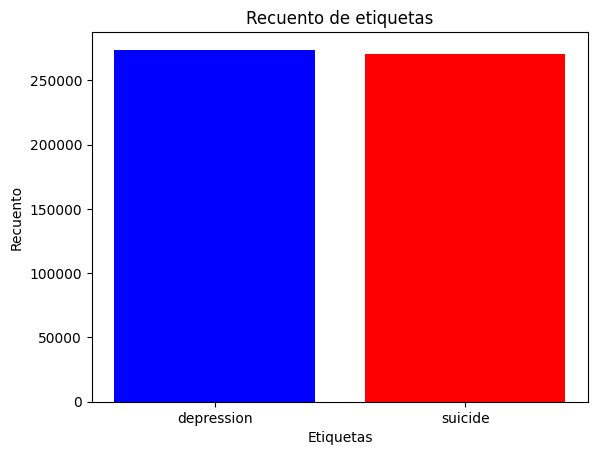

In [73]:
import matplotlib.pyplot as plt

plt.bar(train_data['label'].value_counts().index.values,
        train_data['label'].value_counts(),
        color=['blue', 'red', 'green'])  # Asigna colores por defecto o a tu elección

plt.xlabel('Etiquetas')
plt.ylabel('Recuento')
plt.title('Recuento de etiquetas')

plt.show()


## Data Cleaning

In [71]:
!pip install neattext
from tqdm import tqdm
import neattext.functions as nfx

Defaulting to user installation because normal site-packages is not writeable


Esta función, clean_text, se utiliza para limpiar y procesar texto. Aquí está la explicación de lo que hace cada parte:

    def clean_text(text):: Esto define una función llamada clean_text que toma un argumento text, que es una lista de cadenas de texto que se va a limpiar y procesar.

    text_length=[] y cleaned_text=[]: Estas son listas vacías que se utilizan para almacenar la longitud de cada texto después de la limpieza (text_length) y los textos limpios resultantes (cleaned_text).

    for sent in tqdm(text):: Esto itera sobre cada cadena de texto en la lista text. tqdm se utiliza aquí para mostrar una barra de progreso mientras se itera sobre los textos.

    sent=sent.lower(): Convierte el texto a minúsculas. Esto asegura que las palabras que son iguales excepto por la capitalización se traten como iguales.

    sent=nfx.remove_special_characters(sent): Utiliza una función remove_special_characters de la biblioteca nfx (presumiblemente neural_prophet_extensions) para eliminar caracteres especiales, como signos de puntuación y símbolos.

    sent=nfx.remove_stopwords(sent): Utiliza una función remove_stopwords de la biblioteca nfx para eliminar palabras comunes que generalmente no tienen mucho significado en el análisis de texto, como "el", "la", "y", etc. Estas palabras se conocen como "stopwords".

    text_length.append(len(sent.split())): Calcula la longitud del texto limpio (en número de palabras) y la agrega a la lista text_length. Divide el texto limpio en palabras utilizando split() y luego cuenta cuántas palabras hay en él usando len().

    cleaned_text.append(sent): Agrega el texto limpio resultante a la lista cleaned_text.

    return cleaned_text,text_length: Devuelve dos valores: la lista de textos limpios (cleaned_text) y la lista de longitudes de texto (text_length).

In [72]:
def clean_text(tweet):
    text_length=[]
    cleaned_text=[]
    for sent in tqdm(tweet):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text,text_length

In [75]:
cleaned_train_text,train_text_length=clean_text(train_data.tweet)
cleaned_test_text,test_text_length=clean_text(test_data.tweet)

100%|████████████████████████████████| 233393/233393 [00:06<00:00, 36907.35it/s]


Tokenizar es el proceso de dividir una cadena de texto en unidades más pequeñas, llamadas tokens. Estos tokens pueden ser palabras individuales, subcadenas más pequeñas (como n-gramas), símbolos de puntuación o incluso caracteres individuales, dependiendo de cómo se defina el proceso de tokenización.

El objetivo principal de la tokenización es convertir el texto en una forma que sea más fácil de procesar para tareas de procesamiento de lenguaje natural (NLP) o análisis de texto. 

In [75]:
!pip install Keras
import keras
from keras.preprocessing.text import Tokenizer

Defaulting to user installation because normal site-packages is not writeable


In [76]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(cleaned_train_text)

In [77]:
cleaned_train_text

['friends rememb spent day rot rom play videogames point hope im gon na die suden slep day',
 'im sick mental health problem becaus close famili friend understand fuli debilit everyday life im low point hapen everi wek like peopl cope acept im semiokay someon regular sufer mental health son ani sign deterior downfal fel like everyon turn away becaus im complic peopl mental health decreases onli reason dont want suicid becaus emerg servic countri masiv overstretch right becaus corona virus outbreak b becaus threaten someth mum probabl cal crisi team uk hour emerg mental health team emerg servic reason dont want fel like burden',
 'parent octob past month husband famili didnt tri contact concern whi stil think',
 'im ur averag redit post bare im necesarili suicid definit think everyday option lost friends im fail highschol futur lok terible miserable mental ward sinc iv sever depres numb meds medicin doesnt help depresion onli numb fel noth read post iv reach old friend know stil care ne

In [83]:
from keras.preprocessing.sequence import pad_sequences

In [78]:
train_text_sq=tokenizer.texts_to_sequences(cleaned_train_text)# Convertir textos de entrenamiento en secuencias de números enteros utilizando el tokenizador
train_text_pad=pad_sequences(train_text_sq,maxlen=50)# Rellenar o recortar las secuencias de entrenamiento para que tengan una longitud fija de 50 elementos

test_text_sq=tokenizer.texts_to_sequences(cleaned_test_text)
test_text_pad=pad_sequences(test_text_sq,maxlen=50)
               

In [79]:
train_text_pad

array([[   0,    0,    0, ...,  580,  101,   18],
       [   4,   82,  155, ...,    2,    4,  373],
       [   0,    0,    0, ...,   44,   36,   12],
       ...,
       [   0,    0,    0, ...,   17,   91,   15],
       [   3,    2,    4, ...,  129,   37,   46],
       [  30,  628,   93, ...,    1,   22, 1159]], dtype=int32)

# Glove Embeddings

In [96]:
from sklearn.preprocessing import LabelEncoder

lbl_target=LabelEncoder()
train_output=lbl_target.fit_transform(train_data['label'])
test_output=lbl_target.transform(test_data['label'])

In [78]:
import pickle
import numpy as np

In [79]:
with open('glove.840B.300d.pkl','rb') as fp:
    glove_embedding=pickle.load(fp)

In [80]:
v=len(tokenizer.word_index)

embedding_matrix=np.zeros((v+1,300),dtype=float)
for word,idx in tokenizer.word_index.items():
    embedding_vector=glove_embedding.get(word)
    if embedding_vector is not None:
        embedding_matrix[idx]=embedding_vector

In [81]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.074482  ,  0.58293003, -0.78233999, ..., -0.24984001,
        -0.096953  ,  0.66692001],
       [-0.35394999,  0.23051   , -0.62689   , ..., -0.20720001,
         0.52003002,  0.51129001],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52814001, -0.37724999,  0.28428   , ...,  0.42491999,
        -0.35347   , -0.22041   ],
       [-0.52508003, -0.1135    , -0.35396999, ..., -0.59610999,
        -0.74106002, -1.01119995]])

In [91]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # Importar las clases EarlyStopping y ReduceLROnPlateau desde keras.callbacks
early_stop=EarlyStopping(patience=5)# Crear una instancia de EarlyStopping con un parámetro de paciencia igual a 5
reducelr=ReduceLROnPlateau(patience=3)# Crear una instancia de ReduceLROnPlateau con un parámetro de paciencia igual a 3

# Model Squential by Keras

In [92]:
from keras.models import Sequential
from keras.layers import Input, Embedding, LSTM, GlobalMaxPooling1D, Dense
from keras.optimizers import SGD
from keras.metrics import Precision, Recall, AUC

In [ ]:
# Definición del modelo
# model = Sequential()
# model.add(Input(shape=(50,)))
# model.add(Embedding(v + 1, 300, weights=[embedding_matrix], trainable=False))
# model.add(LSTM(20, return_sequences=True))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(3, activation='softmax'))  # 3 unidades y activación softmax
# model.compile(optimizer=SGD(0.1, momentum=0.09), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])

In [88]:
model = Sequential()
model.add(Input(shape=(50,)))
model.add(Embedding(v + 1, 300, weights=[embedding_matrix], trainable=False))
model.add(LSTM(20, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  #  3 unidades y activación softmax
model.compile(optimizer=SGD(0.1, momentum=0.09), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()]) # Cambiado a categorical_crossentropy


In [89]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 300)           79175700  
                                                                 
 lstm_5 (LSTM)               (None, 50, 20)            25680     
                                                                 
 global_max_pooling1d_5 (Gl  (None, 20)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_10 (Dense)            (None, 256)               5376      
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 79207013 (302.15 MB)
Trainable params: 31313 (122.32 KB)
Non-trainable params: 79175700 (302.03 MB)
______

# TRAINING AND EVALUATION

In [90]:
r = model.fit(train_text_pad, train_output, validation_data=(test_text_pad, test_output),
              epochs=50, batch_size=256, callbacks=[early_stop, reducelr])

Epoch 1/50
2128/2128 [==============================] - 76s 35ms/step - loss: 0.6079 - accuracy: 0.6665 - precision: 0.6640 - recall: 0.6666 - auc: 0.7286 - val_loss: 0.5990 - val_accuracy: 0.6791 - val_precision: 0.6266 - val_recall: 0.8794 - val_auc: 0.7675 - lr: 0.1000
Epoch 2/50
2128/2128 [==============================] - 75s 35ms/step - loss: 0.5702 - accuracy: 0.7061 - precision: 0.6900 - recall: 0.7424 - auc: 0.7716 - val_loss: 0.5935 - val_accuracy: 0.6886 - val_precision: 0.7466 - val_recall: 0.5666 - val_auc: 0.7774 - lr: 0.1000
Epoch 3/50
2128/2128 [==============================] - 75s 35ms/step - loss: 0.5618 - accuracy: 0.7124 - precision: 0.6951 - recall: 0.7508 - auc: 0.7802 - val_loss: 0.5620 - val_accuracy: 0.7122 - val_precision: 0.7178 - val_recall: 0.6950 - val_auc: 0.7831 - lr: 0.1000
Epoch 4/50
2128/2128 [==============================] - 76s 36ms/step - loss: 0.5562 - accuracy: 0.7162 - precision: 0.6991 - recall: 0.7537 - auc: 0.7857 - val_loss: 0.5547 - val_a

7294/7294 [==============================] - 46s 6ms/step


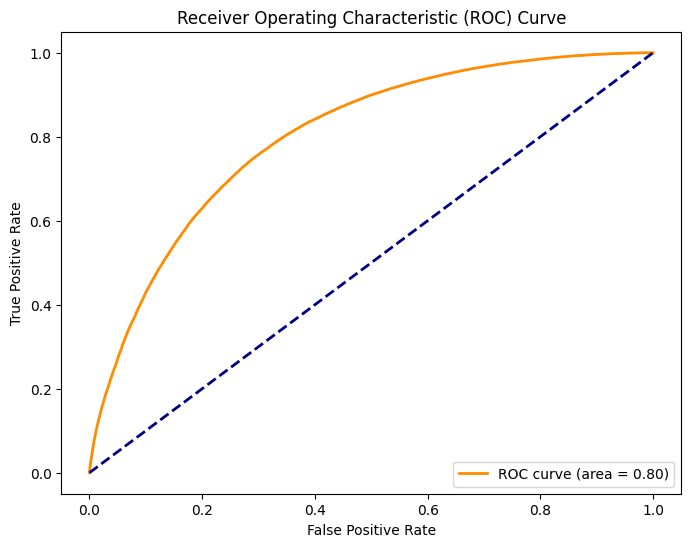

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(test_text_pad)

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(test_output, y_pred)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [93]:
from sklearn.metrics import classification_report


In [99]:
# Obtener las probabilidades de predicción del modelo en el conjunto de prueba
y_pred_prob = model.predict(test_text_pad)

# Convertir las probabilidades en clases utilizando un umbral (por ejemplo, 0.5)
y_pred_classes = (y_pred_prob > 0.5).astype(int)

# Imprimir el informe de clasificación
print('Testing data classification report \n \n')
print(classification_report(test_output, y_pred_classes, target_names=lbl_target.inverse_transform([0,1])))


7294/7294 [==============================] - 34s 5ms/step
Testing data classification report 
 

              precision    recall  f1-score   support

  depression       0.74      0.70      0.72    117220
     suicide       0.71      0.76      0.74    116173

    accuracy                           0.73    233393
   macro avg       0.73      0.73      0.73    233393
weighted avg       0.73      0.73      0.73    233393



In [100]:
# Obtener las probabilidades de predicción del modelo en el conjunto de prueba
y_train_prob = model.predict(train_text_pad)

# Convertir las probabilidades en clases utilizando un umbral (por ejemplo, 0.5)
y_train_classes = (y_trainModelo/Modelo/Data/parquet_prob > 0.5).astype(int)

# Imprimir el informe de clasificación
print('Testing data classification report \n \n')
print(classification_report(test_output, y_pred_classes, target_names=lbl_target.inverse_transform([0,1])))


17019/17019 [==============================] - 82s 5ms/step
Testing data classification report 
 

              precision    recall  f1-score   support

  depression       0.74      0.70      0.72    117220
     suicide       0.71      0.76      0.74    116173

    accuracy                           0.73    233393
   macro avg       0.73      0.73      0.73    233393
weighted avg       0.73      0.73      0.73    233393



In [104]:
!pip install googletrans==4.0.0-rc1

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.8 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=86f156db13e46cc5f4c454338f4f3c9431ca70eb933edb2654f65028a9f17a13
  Stored in directory: /home/alex/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans


In [119]:
from googletrans import Translator
from keras.preprocessing.sequence import pad_sequences

def predict_mental_health_post(text):
    translator = Translator()
    translated_text = translator.translate(text, dest='en').text

    twt = [translated_text]
    twt = tokenizer.texts_to_sequences(twt)
    twt = pad_sequences(twt, maxlen=50)

    prediction = model.predict(twt)[0][0]
    
    print("El texto ingresado tiene un {:.2%} de probabilidad de ser:".format(prediction))
    if prediction > 0.6:
        print("Potencialmente un post sobre suicidio.")
    elif 0.4 <= prediction <= 0.6:
        print("Potencialmente un post sobre depresión.")
    else:
        print("No parece ser un post sobre suicidio o depresión.")

# Ejemplo de uso
texto = input("Ingrese el texto que desea analizar: ")
predict_mental_health_post(texto)

Ingrese el texto que desea analizar:  quiero pegarme 10 tiros


1/1 [==============================] - 0s 22ms/step
El texto ingresado tiene un 77.02% de probabilidad de ser:
Potencialmente un post sobre suicidio.


# Guardar el modelo

In [121]:
from ipywidgets import interact, widgets, Layout
from IPython.display import display, clear_output
from googletrans import Translator
from keras.preprocessing.sequence import pad_sequences

# Crear función predict_mental_health_post con parámetro interactivo
def predict_mental_health_post(text):
    translator = Translator()
    translated_text = translator.translate(text, dest='en').text

    twt = [translated_text]
    twt = tokenizer.texts_to_sequences(twt)
    twt = pad_sequences(twt, maxlen=50)

    prediction = model.predict(twt)[0][0]

    output.clear_output()
    with output:
        print("El texto ingresado tiene un {:.2%} de probabilidad de ser:".format(prediction))
        if prediction > 0.6:
            print("Potencialmente un post sobre suicidio.")
        elif 0.4 <= prediction <= 0.6:
            print("Potencialmente un post sobre depresión.")
        else:
            print("No parece ser un post sobre suicidio o depresión.")

# Definir la función que interactúa con la interfaz
def interactive_mental_health_analysis(button):
    global output
    text_input = widgets.Textarea(
        value='',
        placeholder='Ingrese el texto que desea analizar...',
        description='Texto:',
        layout=Layout(width='50%')
    )

    output = widgets.Output()

    button = widgets.Button(description="Analizar")
    button.on_click(lambda btn: predict_mental_health_post(text_input.value))

    display(text_input, button, output)

# Llamar a la función para iniciar la interfaz interactiva
interactive_mental_health_analysis(button=None)


Textarea(value='', description='Texto:', layout=Layout(width='50%'), placeholder='Ingrese el texto que desea a…

Button(description='Analizar', style=ButtonStyle())

Output()

In [120]:
pickle.dump(tokenizer,open('tokenizer.pkl','wb'))

In [122]:
model.save("suicide.keras")

## Cargar el modelo

In [11]:
from keras.models import load_model
token_form=pickle.load(open('tokenizer.pkl','rb'))

2024-06-17 09:30:02.388046: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-17 09:30:02.516804: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 09:30:03.420458: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 09:30:03.424462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 09:30:05.780908: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

NameError: name 'pickle' is not defined

In [123]:
model=load_model('suicide.keras')

In [124]:
from ipywidgets import interact, widgets, Layout
from IPython.display import display, clear_output
from googletrans import Translator
from keras.preprocessing.sequence import pad_sequences

# Crear función predict_mental_health_post con parámetro interactivo
def predict_mental_health_post(text):
    translator = Translator()
    translated_text = translator.translate(text, dest='en').text

    twt = [translated_text]
    twt = token_form.texts_to_sequences(twt)
    twt = pad_sequences(twt, maxlen=50)

    prediction = model.predict(twt)[0][0]

    output.clear_output()
    with output:
        print("El texto ingresado tiene un {:.2%} de probabilidad de ser:".format(prediction))
        if prediction > 0.6:
            print("Potencialmente un post sobre suicidio.")
        elif 0.4 <= prediction <= 0.6:
            print("Potencialmente un post sobre depresión.")
        else:
            print("No parece ser un post sobre suicidio o depresión.")

# Definir la función que interactúa con la interfaz
def interactive_mental_health_analysis(button):
    global output
    text_input = widgets.Textarea(
        value='',
        placeholder='Ingrese el texto que desea analizar...',
        description='Texto:',
        layout=Layout(width='50%')
    )

    output = widgets.Output()

    button = widgets.Button(description="Analizar")
    button.on_click(lambda btn: predict_mental_health_post(text_input.value))

    display(text_input, button, output)

# Llamar a la función para iniciar la interfaz interactiva
interactive_mental_health_analysis(button=None)


Textarea(value='', description='Texto:', layout=Layout(width='50%'), placeholder='Ingrese el texto que desea a…

Button(description='Analizar', style=ButtonStyle())

Output()